In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
csv_df = pd.read_csv('tested.csv')

In [3]:
csv_df.tail(120)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
298,1190,0,1,"Loring, Mr. Joseph Holland",male,30.0,0,0,113801,45.5000,NaN,S
299,1191,0,3,"Johansson, Mr. Nils",male,29.0,0,0,347467,7.8542,NaN,S
300,1192,0,3,"Olsson, Mr. Oscar Wilhelm",male,32.0,0,0,347079,7.7750,NaN,S
301,1193,0,2,"Malachard, Mr. Noel",male,NaN,0,0,237735,15.0458,D,C
302,1194,0,2,"Phillips, Mr. Escott Robert",male,43.0,0,1,S.O./P.P. 2,21.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
csv_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [5]:
csv_df['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

<AxesSubplot:>

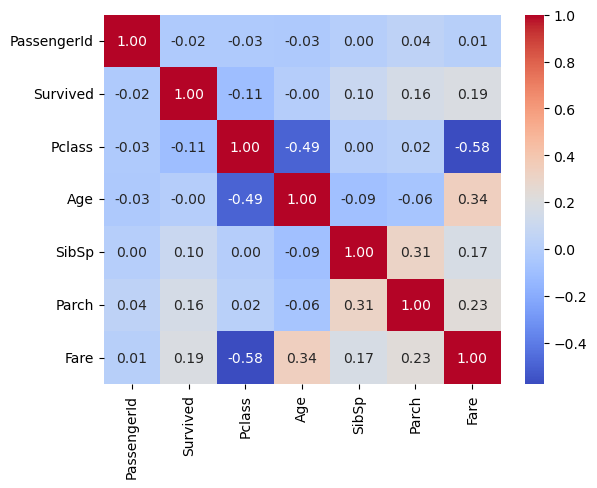

In [6]:
sns.heatmap(csv_df.corr(),cmap='coolwarm', annot=True, fmt=".2f")

<AxesSubplot:xlabel='Survived', ylabel='count'>

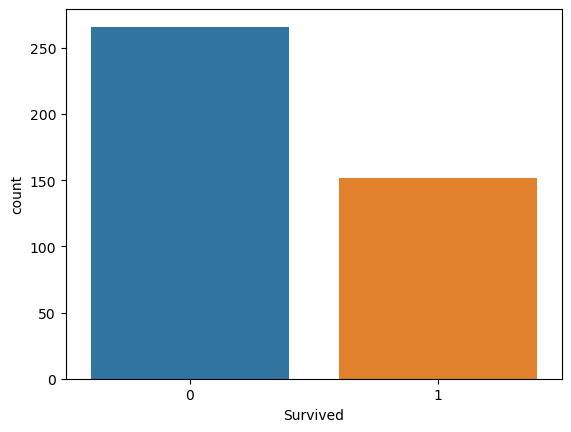

In [7]:
sns.countplot(x='Survived', data=csv_df, label="count")

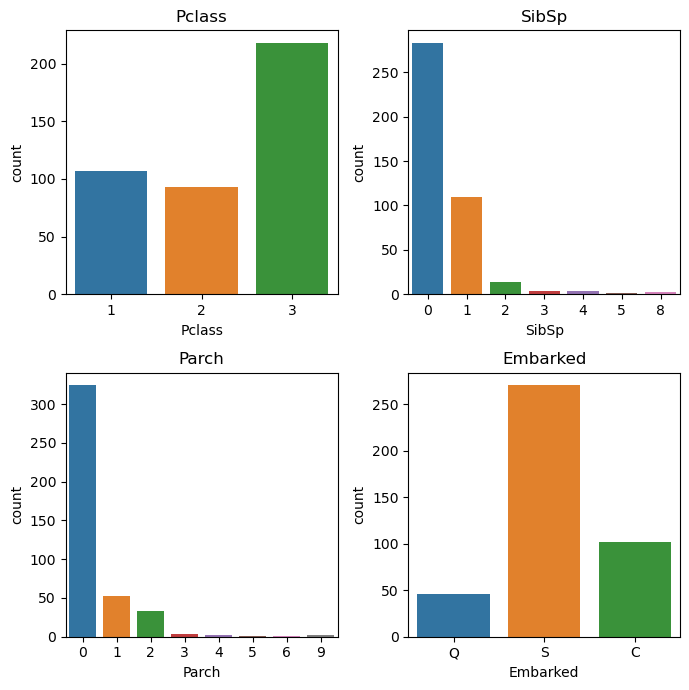

In [8]:
cols = ['Pclass','SibSp','Parch','Embarked']
n_rows = 2
n_cols = 2

fig, axs = plt.subplots(n_rows,n_cols,figsize=(n_cols*3.5,n_rows*3.5))

for r_num in range(0,n_rows):
    for c_num in range(0,n_cols):
        index = r_num*n_cols+c_num
        ax = axs[r_num][c_num]
        sns.countplot(x=csv_df[cols[index]], data = csv_df, ax=ax)
#         ax.legend(title='Survived',loc='upper right')
        ax.set_title(cols[index])
plt.tight_layout()

<AxesSubplot:xlabel='SibSp', ylabel='count'>

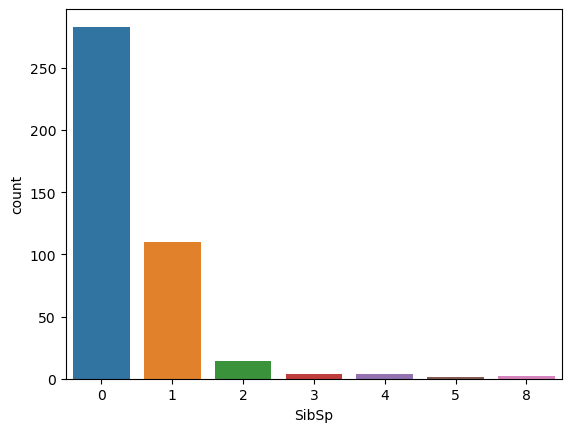

In [9]:
# plot of survival rate of SibSp
sns.countplot(x='SibSp',data=csv_df)

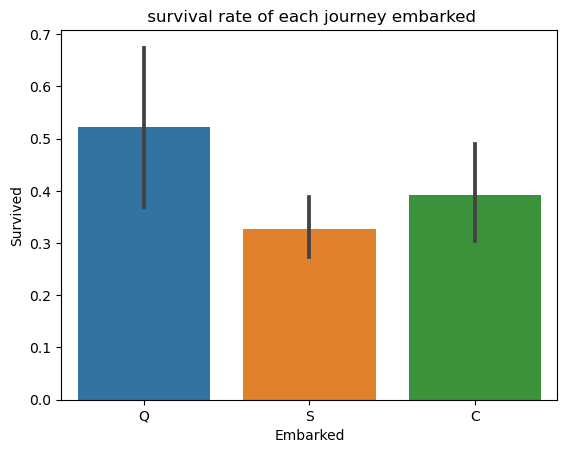

In [10]:
# plot of survival rate of each journey embarked
sns.barplot(x='Embarked',y='Survived', data=csv_df)
plt.title(' survival rate of each journey embarked');

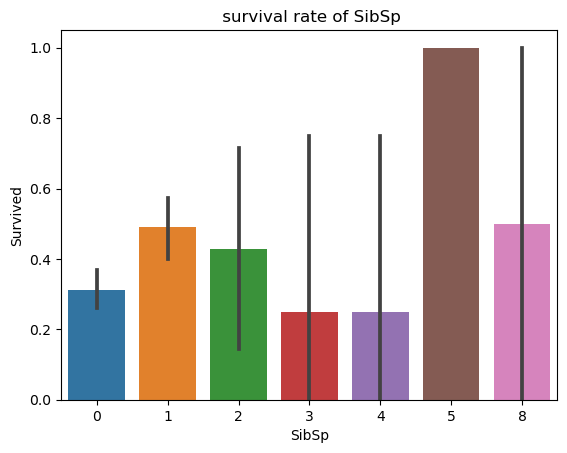

In [11]:
#### plot of survival rate of SibSp
sns.barplot(x='SibSp',y='Survived',data=csv_df)
plt.title(' survival rate of SibSp');

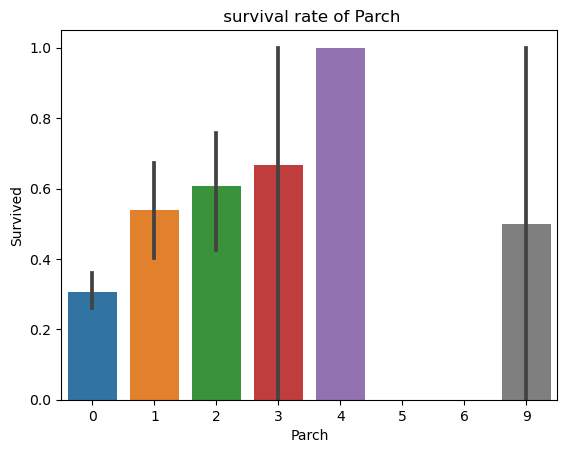

In [12]:
#### plot of survival rate of Parch
sns.barplot(x='Parch',y='Survived',data=csv_df)
plt.title(' survival rate of Parch');

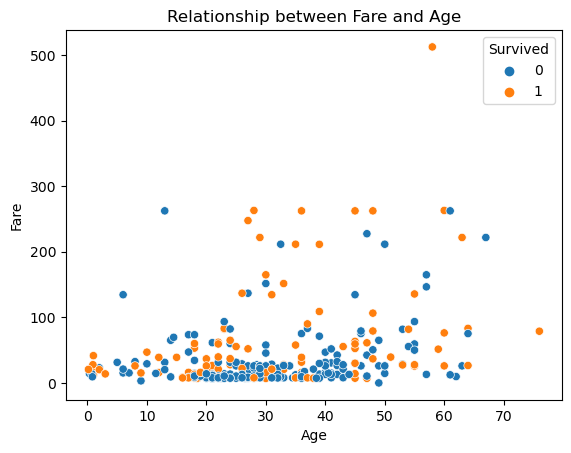

In [13]:
sns.scatterplot(x='Age',y='Fare',hue='Survived',data=csv_df)
plt.title("Relationship between Fare and Age");

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


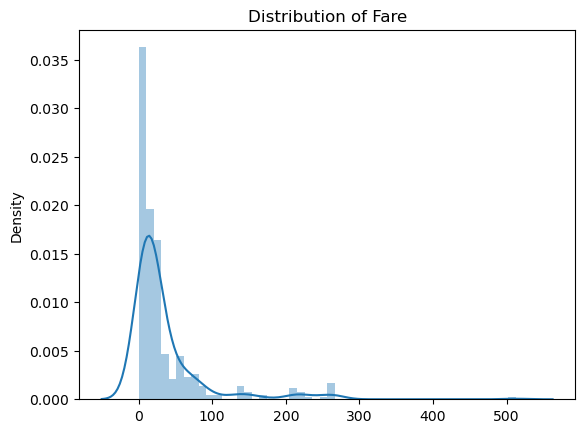

In [14]:
sns.distplot(x=csv_df['Fare'])
plt.title('Distribution of Fare');

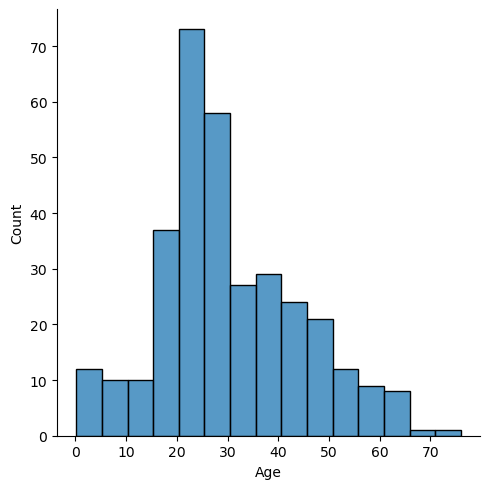

In [15]:
sns.displot(csv_df['Age'])
plt.title('Distribution of Age');

In [16]:
# count of missing values in each columns
csv_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

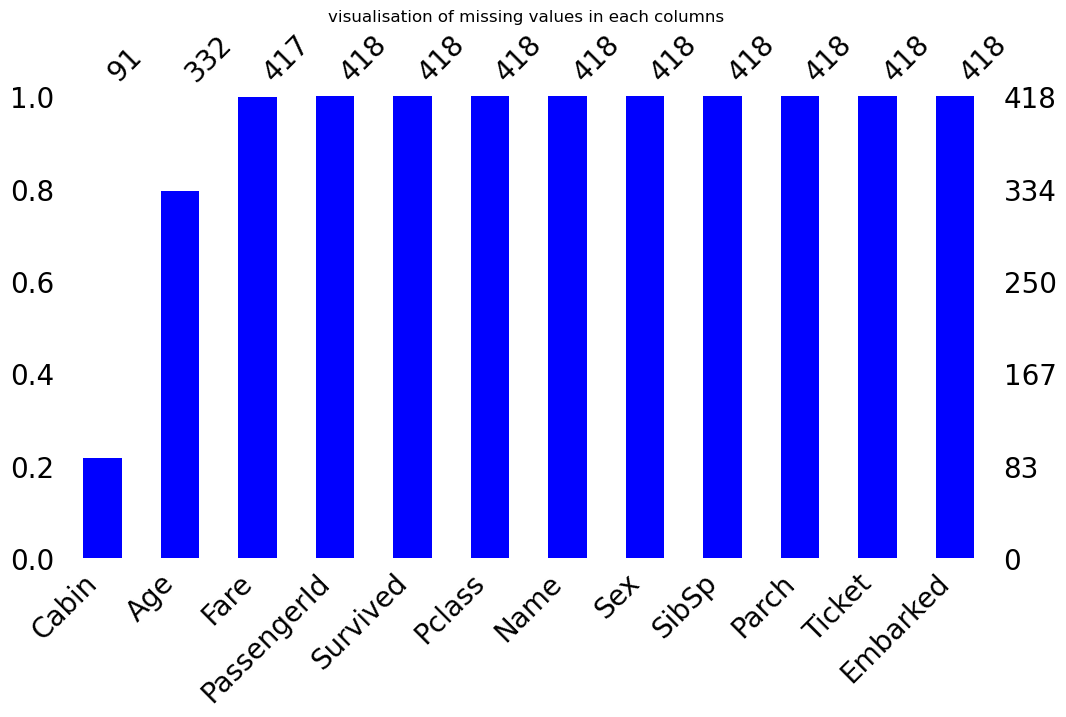

In [17]:
# visualising missing values in each columns 
import missingno as msno
msno.bar(csv_df,color='blue',sort='ascending',fontsize=20,figsize=(12,6))
plt.title('visualisation of missing values in each columns ');

In [18]:
# fill rows with missing values
csv_df['Age'] =round(csv_df['Age'].fillna(csv_df['Age'].mean()),1)
csv_df['Fare'] =round(csv_df['Fare'].fillna(csv_df['Fare'].mean()),1)

In [19]:
# drop redundant columns and unnecessary columns
csv_df.drop(['Cabin','Name','Ticket','PassengerId'],axis=1,inplace=True)

In [20]:
csv_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8,Q
1,1,3,female,47.0,1,0,7.0,S
2,0,2,male,62.0,0,0,9.7,Q
3,0,3,male,27.0,0,0,8.7,S
4,1,3,female,22.0,1,1,12.3,S
...,...,...,...,...,...,...,...,...
413,0,3,male,30.3,0,0,8.0,S
414,1,1,female,39.0,0,0,108.9,C
415,0,3,male,38.5,0,0,7.2,S
416,0,3,male,30.3,0,0,8.0,S


In [21]:
csv_df['Embarked'].unique()


array(['Q', 'S', 'C'], dtype=object)

In [22]:
csv_df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [23]:
# look at datatypes
csv_df.dtypes.reset_index()

,index,0
0,Survived,int64
1,Pclass,int64
2,Sex,object
3,Age,float64
4,SibSp,int64
5,Parch,int64
6,Fare,float64
7,Embarked,object


In [24]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

# Encoding the sex and embarked column to numerical values
csv_df.iloc[:,2] = labelencoder.fit_transform(csv_df.iloc[:,2].values)
csv_df.iloc[:,7] = labelencoder.fit_transform(csv_df.iloc[:,7].values)

In [25]:
csv_df['Sex'].unique()

array([1, 0])

In [26]:
csv_df['Embarked'].unique()

array([1, 2, 0])

In [27]:
csv_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,34.5,0,0,7.8,1
1,1,3,0,47.0,1,0,7.0,2
2,0,2,1,62.0,0,0,9.7,1
3,0,3,1,27.0,0,0,8.7,2
4,1,3,0,22.0,1,1,12.3,2
...,...,...,...,...,...,...,...,...
413,0,3,1,30.3,0,0,8.0,2
414,1,1,0,39.0,0,0,108.9,0
415,0,3,1,38.5,0,0,7.2,2
416,0,3,1,30.3,0,0,8.0,2


# Training and Testing Model

In [28]:
# 'X' independent variable and 'Y' dependent variaable
X = csv_df.iloc[:].drop(['Survived'],axis=1)
Y = csv_df['Survived']

In [29]:
# split the dataset into 80% training and 20% testing and using cross validation score to compare model
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=46)

In [30]:
# scale the data making it easier and faster for the model to train on the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [31]:
# create a fuction with seven machine learning models or techniqus
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import metrics 
def machine(X_train, Y_train):
    
#   use Logistic Regression
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state=0)
    log.fit(X_train,Y_train)
    pred = log.predict(X_test)
   
#   use KNeighbors
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors = 5, metric='minkowski',p=2)
    knn.fit(X_train,Y_train)
    pred2 = knn.predict(X_test)
 
    
#   use SVC (linear Kernel)
    from sklearn.svm import SVC
    svc_lin = SVC(kernel='linear', random_state = 0)
    svc_lin.fit(X_train,Y_train)
    pred3 = svc_lin.predict(X_test)
    
#   use SVC (RBF Kernel)
    from sklearn.svm import SVC
    svc_rbf = SVC(kernel='rbf', random_state = 0)
    svc_rbf.fit(X_train,Y_train)
    pred4 = svc_rbf.predict(X_test)
  
    
#   use GaussianNB
    from sklearn.naive_bayes import GaussianNB
    gauss = GaussianNB()
    gauss.fit(X_train,Y_train)
    pred5 = gauss.predict(X_test)
  
    
#   use Decision Tree
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    tree.fit(X_train,Y_train)
    pred6 = tree.predict(X_test)
  
    
#   use RandomForestClassifier
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators=10,criterion = 'entropy', random_state = 0)
    forest.fit(X_train,Y_train)
    pred7 = forest.predict(X_test)
    

#   print the accuracy of each model
    print('[0]Training Logistic Regression Accuracy:', log.score(X_train,Y_train))
    print('[0]Test Logistic Regression Accuracy:', log.score(X_test,Y_test))
    print('[0]Accuracy Logistic Regression:', accuracy_score(Y_test,pred))
    print('[0]Confusion matrix: \n', confusion_matrix(Y_test,pred))
    print('[0]Classification report:\n', confusion_matrix(Y_test,pred))
    print()
    print('[1]Training KNeighbors Accuracy', knn.score(X_train,Y_train))
    print('[1]Test KNeighbors Accuracy:', knn.score(X_test,Y_test))
    print('[1]Accuracy KNeighbors:', accuracy_score(Y_test,pred2))
    print('[1]Confusion matrix: \n', confusion_matrix(Y_test,pred2))
    print('[1]Classification report:\n', confusion_matrix(Y_test,pred2))
    print()
    print('[2]Training SVC (linear Kernel) Accuracy', svc_lin.score(X_train,Y_train))
    print('[2]Test SVC (linear Kernel) Accuracy:', svc_lin.score(X_test,Y_test))
    print('[2]Accuracy SVC (linear Kernel) :', accuracy_score(Y_test,pred3))
    print('[2]Confusion matrix: \n', confusion_matrix(Y_test,pred3))
    print('[2]Classification report:\n', confusion_matrix(Y_test,pred3))
    print()
    print('[3]Training SVC (RBF Kernel) Accuracy', svc_rbf.score(X_train,Y_train))
    print('[3]Test SVC (RBF Kernel) Accuracy:', svc_rbf.score(X_test,Y_test))
    print('[3]Accuracy SVC (RBF Kernel) :', accuracy_score(Y_test,pred4))
    print('[3]Confusion matrix: \n', confusion_matrix(Y_test,pred4))
    print('[3]Classification report:\n', confusion_matrix(Y_test,pred4))
    print()
    print('[4]Training GaussianNB Accuracy', gauss.score(X_train,Y_train))
    print('[4]Test GaussianNB Accuracy:', gauss.score(X_test,Y_test))
    print('[4]Accuracy GaussianNB :', accuracy_score(Y_test,pred5))
    print('[4]Confusion matrix: \n', confusion_matrix(Y_test,pred5))
    print('[4]Classification report:\n', confusion_matrix(Y_test,pred5))
    print()
    print('[5]Training DecisionTreeClassifier Accuracy', tree.score(X_train,Y_train))
    print('[5]Test DecisionTreeClassifier Accuracy:', tree.score(X_test,Y_test))
    print('[5]Accuracy DecisionTreeClassifier :', accuracy_score(Y_test,pred6))
    print('[5]Confusion matrix: \n', confusion_matrix(Y_test,pred6))
    print('[5]Classification report:\n', confusion_matrix(Y_test,pred6))
    print()
    print('[6]Training RandomForestClassifier Accuracy', forest.score(X_train,Y_train))
    print('[6]Test RandomForestClassifier Accuracy:', tree.score(X_test,Y_test))
    print('[6]Accuracy RandomForestClassifier :', accuracy_score(Y_test,pred7))
    print('[6]Confusion matrix: \n', confusion_matrix(Y_test,pred7))
    print('[6]Classification report:\n', confusion_matrix(Y_test,pred7))
    
    return log, knn, svc_lin, svc_rbf, gauss, tree, forest



In [32]:
# train all models
machine = machine(X_train,Y_train)

C:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[0]Training Logistic Regression Accuracy: 1.0
[0]Test Logistic Regression Accuracy: 1.0
[0]Accuracy Logistic Regression: 1.0
[0]Confusion matrix: 
 [[57  0]
 [ 0 27]]
[0]Classification report:
 [[57  0]
 [ 0 27]]

[1]Training KNeighbors Accuracy 0.9970059880239521
[1]Test KNeighbors Accuracy: 0.9880952380952381
[1]Accuracy KNeighbors: 0.9880952380952381
[1]Confusion matrix: 
 [[56  1]
 [ 0 27]]
[1]Classification report:
 [[56  1]
 [ 0 27]]

[2]Training SVC (linear Kernel) Accuracy 1.0
[2]Test SVC (linear Kernel) Accuracy: 1.0
[2]Accuracy SVC (linear Kernel) : 1.0
[2]Confusion matrix: 
 [[57  0]
 [ 0 27]]
[2]Classification report:
 [[57  0]
 [ 0 27]]

[3]Training SVC (RBF Kernel) Accuracy 1.0
[3]Test SVC (RBF Kernel) Accuracy: 1.0
[3]Accuracy SVC (RBF Kernel) : 1.0
[3]Confusion matrix: 
 [[57  0]
 [ 0 27]]
[3]Classification report:
 [[57  0]
 [ 0 27]]

[4]Training GaussianNB Accuracy 1.0
[4]Test GaussianNB Accuracy: 1.0
[4]Accuracy GaussianNB : 1.0


C:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo

[4]Confusion matrix: 
 [[57  0]
 [ 0 27]]
[4]Classification report:
 [[57  0]
 [ 0 27]]

[5]Training DecisionTreeClassifier Accuracy 1.0
[5]Test DecisionTreeClassifier Accuracy: 1.0
[5]Accuracy DecisionTreeClassifier : 1.0
[5]Confusion matrix: 
 [[57  0]
 [ 0 27]]
[5]Classification report:
 [[57  0]
 [ 0 27]]

[6]Training RandomForestClassifier Accuracy 1.0
[6]Test RandomForestClassifier Accuracy: 1.0
[6]Accuracy RandomForestClassifier : 1.0
[6]Confusion matrix: 
 [[57  0]
 [ 0 27]]
[6]Classification report:
 [[57  0]
 [ 0 27]]


In [33]:
# chose DecisionTreeClassifier for predicition
prediction = machine[5].predict(X_test)

In [34]:
prediction

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1], dtype=int64)